In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### For each HUC 6, we have two CSV file include the rating curve data for each stream segment:
    1)hydroprop-fulltable-HUC6.nohand0.csv
    2)hydroprop-fulltable-HUC6.csv
    
### From both files, the rating curve are identical.

In [2]:
file_path = '020700/hydroprop-fulltable-020700.nohand0.csv'
file_path_HD = '020700/hydroprop-fulltable-020700.csv'
df = pd.read_csv(file_path)
df_HD = pd.read_csv(file_path_HD)

In [3]:
df.head()

,CatchId,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
0,8423168,0.0000,0,0.000000,0.000000,0.000000,0.023361,0.857,0.6048,0.05,0.000000,0.000000,0.000000,0.000000,0.000000
1,8423168,0.3048,188,15600.758169,15609.545930,3547.479508,0.023361,0.857,0.6048,0.05,18.203919,18.214173,4.139416,0.227263,4.712273
2,8423168,0.6096,248,20579.699626,20592.758988,9127.974308,0.023361,0.857,0.6048,0.05,24.013652,24.028890,10.651079,0.443261,18.928017
3,8423168,0.9144,296,24562.865300,24584.711503,16048.438012,0.023361,0.857,0.6048,0.05,28.661453,28.686945,18.726299,0.652781,43.075997
4,8423168,1.2192,341,28297.078673,28332.096684,24082.453972,0.023361,0.857,0.6048,0.05,33.018762,33.059623,28.100880,0.850006,77.079618


In [4]:
df_HD.head()

,CatchId,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
0,8423168,0.0000,121,10040.970520,10048.331875,0.000000,0.023361,0.857,0.6048,0.05,11.716418,11.725008,0.000000,0.000000,0.000000
1,8423168,0.3048,188,15600.758169,15609.545930,3547.479508,0.023361,0.857,0.6048,0.05,18.203919,18.214173,4.139416,0.227263,4.712273
2,8423168,0.6096,248,20579.699626,20592.758988,9127.974308,0.023361,0.857,0.6048,0.05,24.013652,24.028890,10.651079,0.443261,18.928017
3,8423168,0.9144,296,24562.865300,24584.711503,16048.438012,0.023361,0.857,0.6048,0.05,28.661453,28.686945,18.726299,0.652781,43.075997
4,8423168,1.2192,341,28297.078673,28332.096684,24082.453972,0.023361,0.857,0.6048,0.05,33.018762,33.059623,28.100880,0.850006,77.079618


In [5]:
# Checking overall the differences in the rating curves from both files
max(df['Discharge (m3s-1)'] - df_HD['Discharge (m3s-1)'])

0.0

In [6]:
# Check the length of both files
print(len(list(df.CatchId.unique())), len(list(df_HD.CatchId.unique())))

16054 16054


In [7]:
# Group each file dataframe by the catchment ID
grpd = df.groupby('CatchId')
grpd_HD = df_HD.groupby('CatchId')

In [8]:
grpd.count().head()

,Stage,Number of Cells,SurfaceArea (m2),BedArea (m2),Volume (m3),SLOPE,LENGTHKM,AREASQKM,Roughness,TopWidth (m),WettedPerimeter (m),WetArea (m2),HydraulicRadius (m),Discharge (m3s-1)
CatchId,,,,,,,,,,,,,,
4504362,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4504364,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4504366,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4504368,83,83,83,83,83,83,83,83,83,83,83,83,83,83
4504370,83,83,83,83,83,83,83,83,83,83,83,83,83,83


In [9]:
# Select on the first 50 groups to plot due to memory issue
selected_grpd = pd.concat( [ grpd.get_group(group) for i,group in enumerate( grpd.groups) if i < 50 ] ).groupby('CatchId')
selected_grpd_HD = pd.concat( [ grpd_HD.get_group(group) for i,group in enumerate( grpd_HD.groups) if i < 50 ] ).groupby('CatchId')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


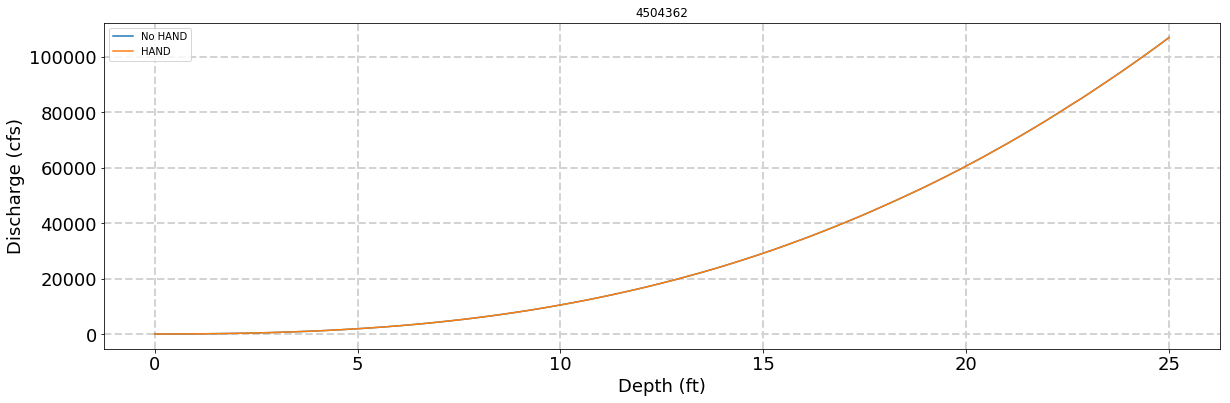

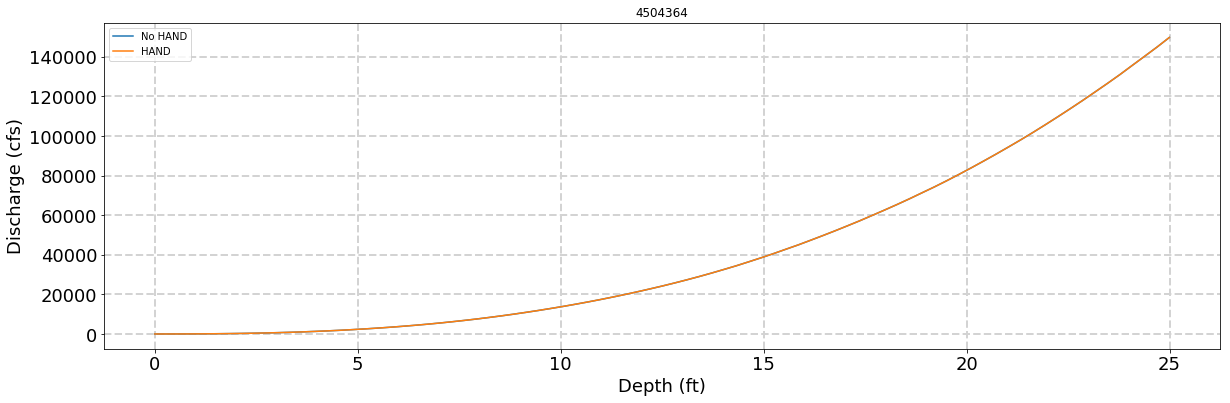

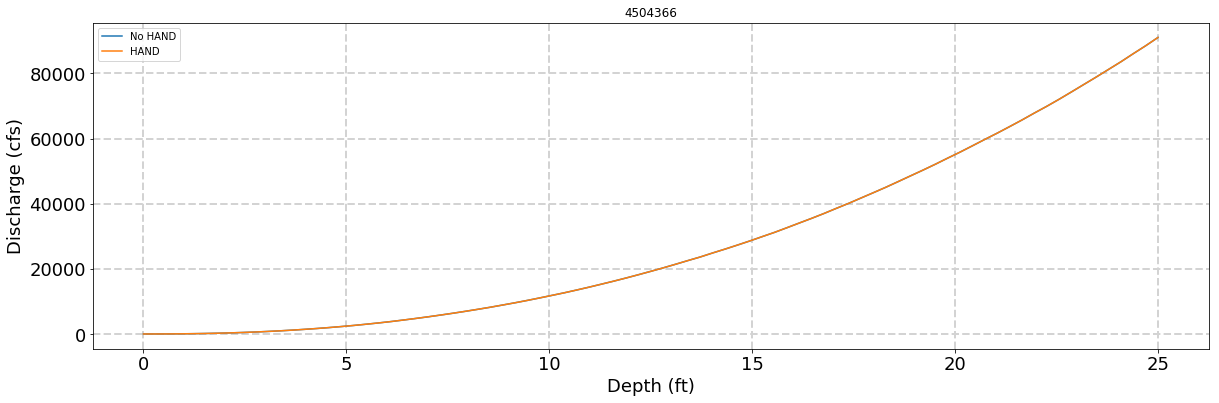

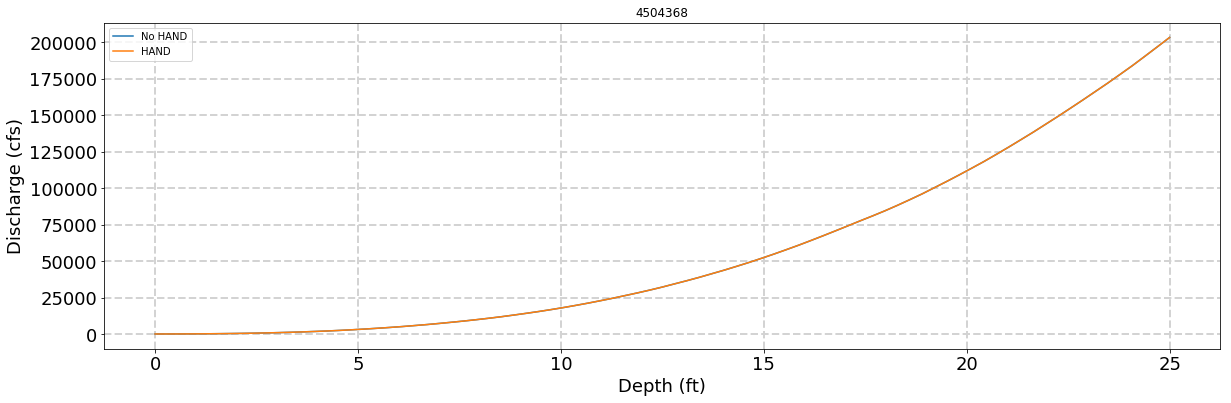

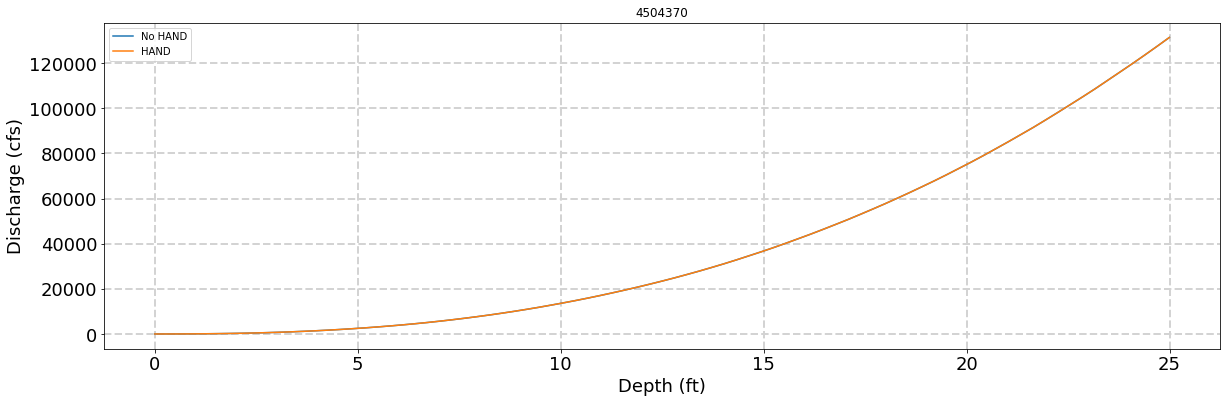

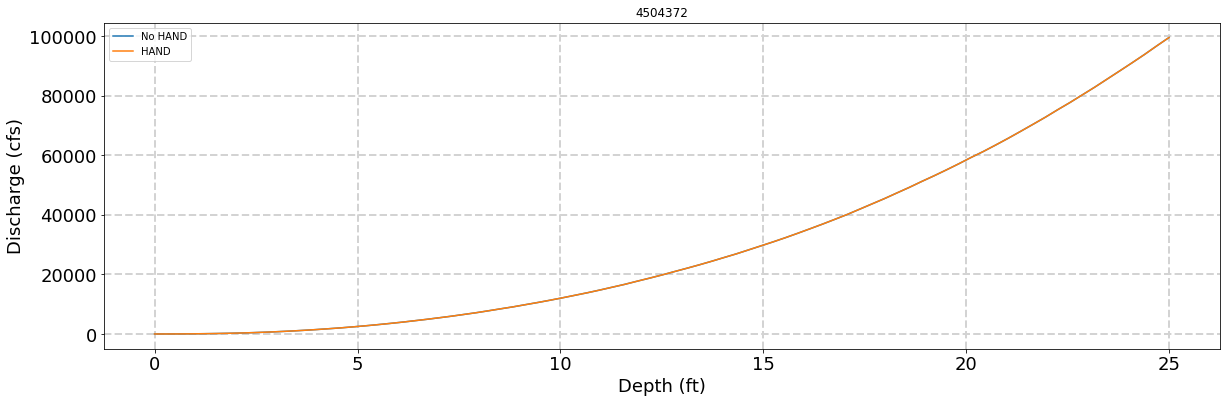

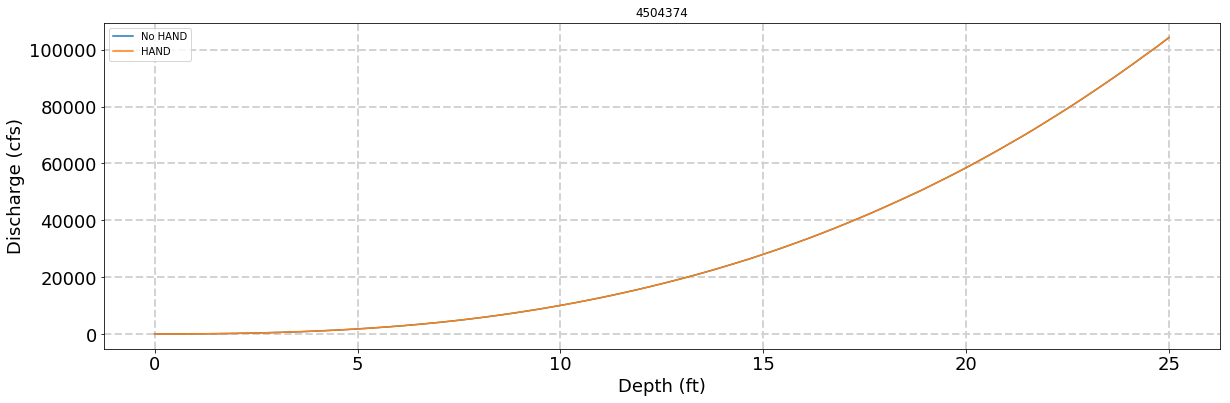

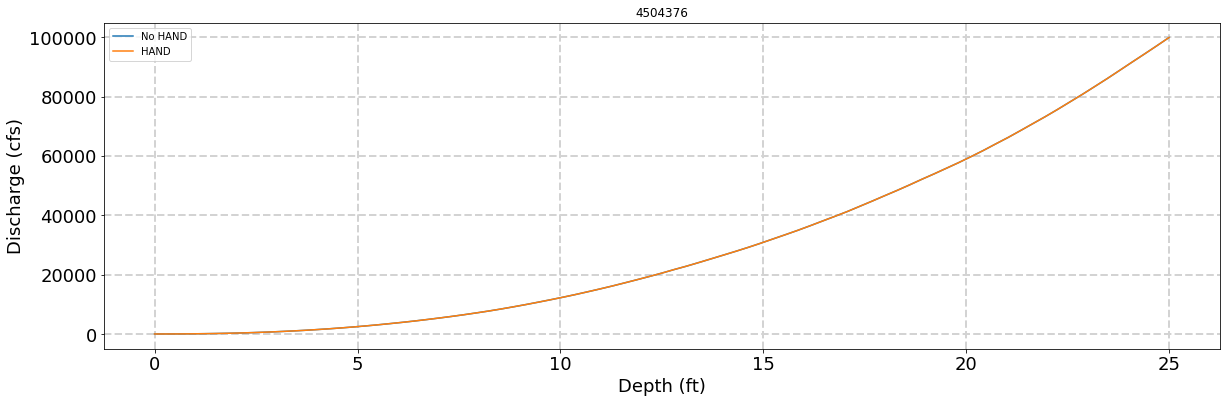

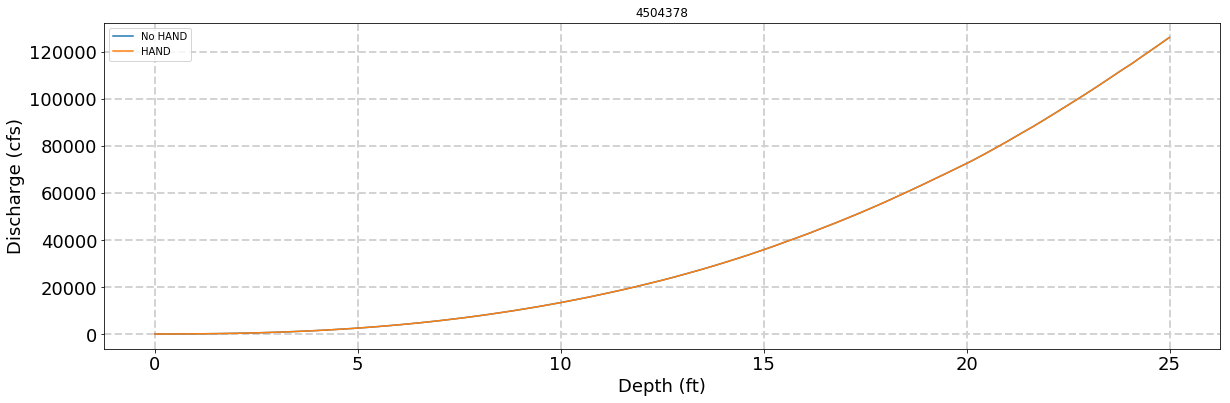

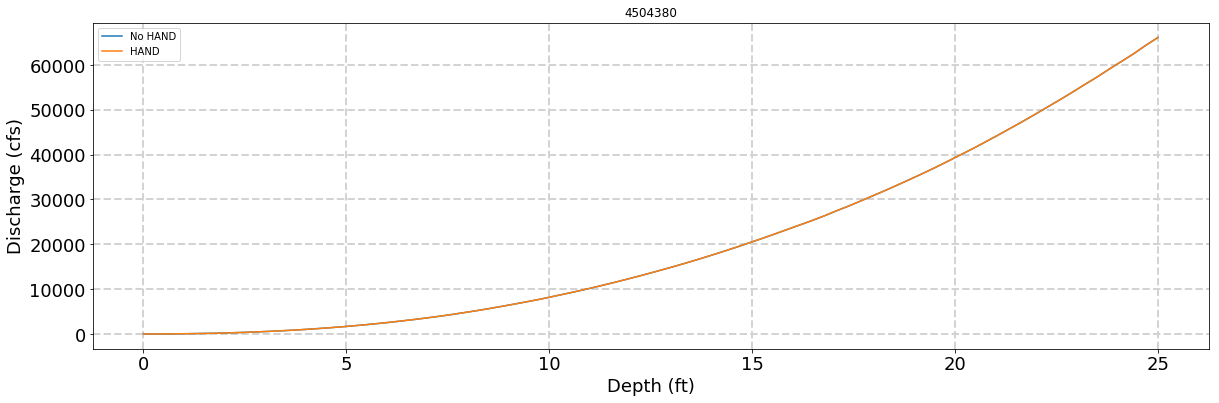

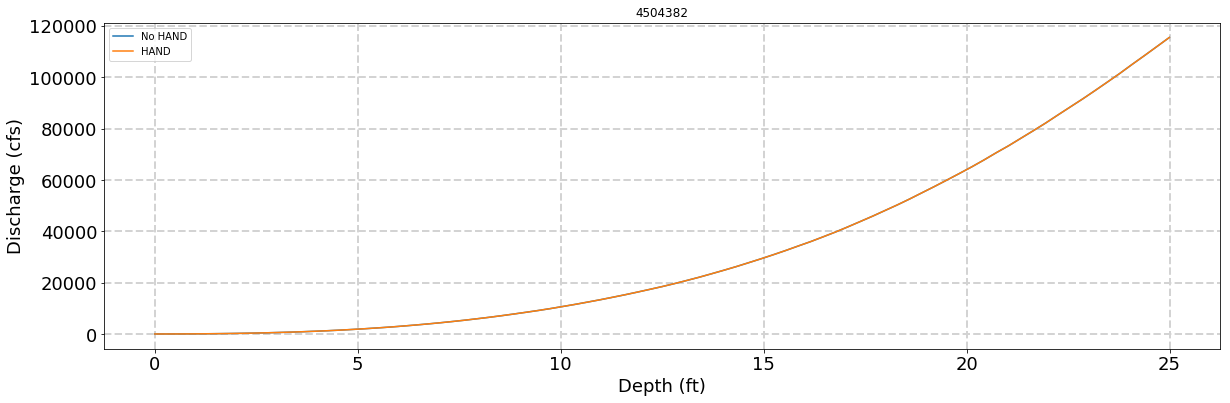

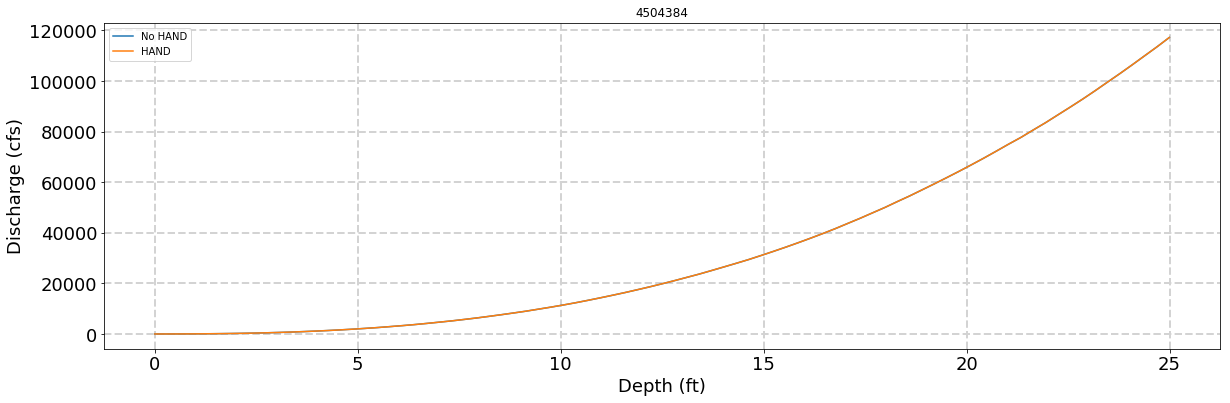

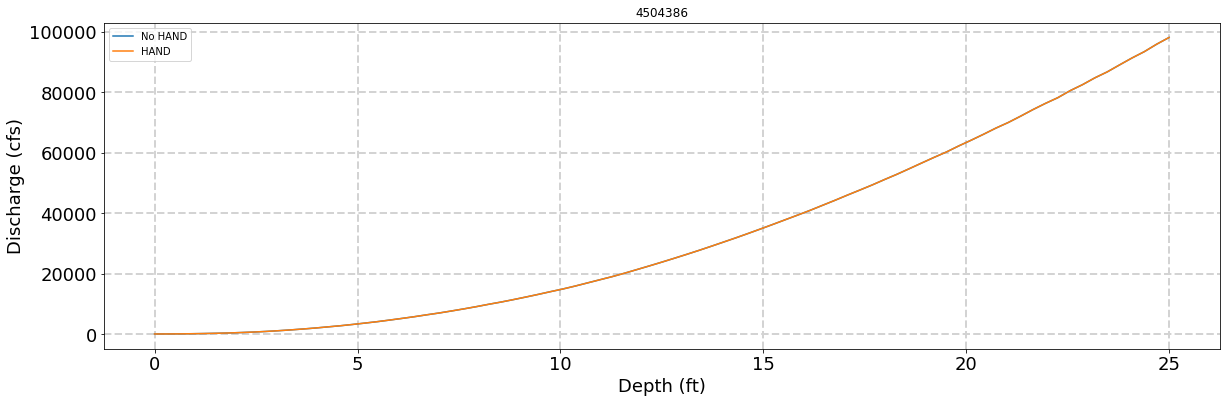

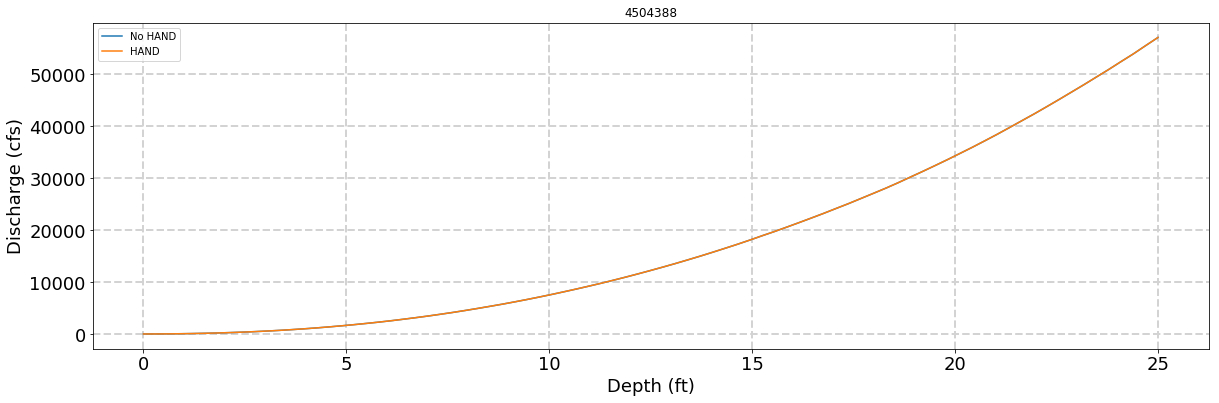

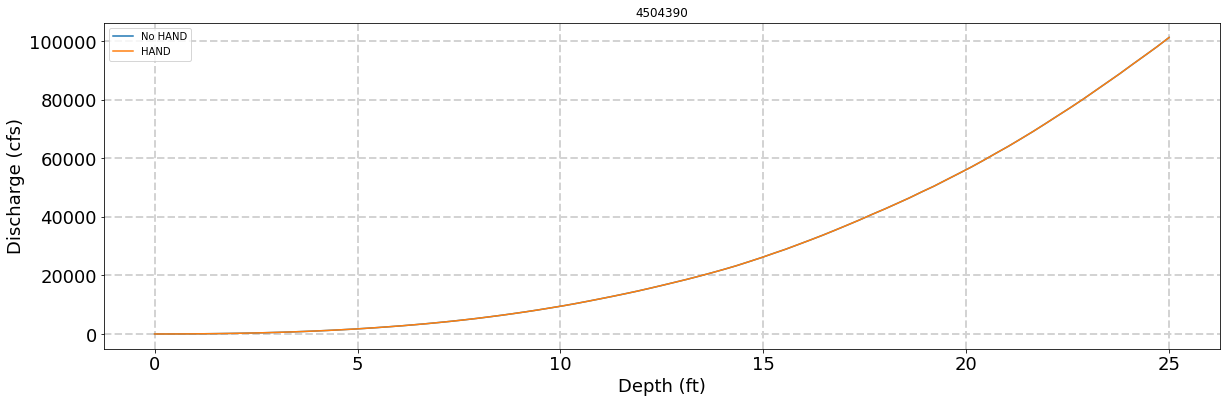

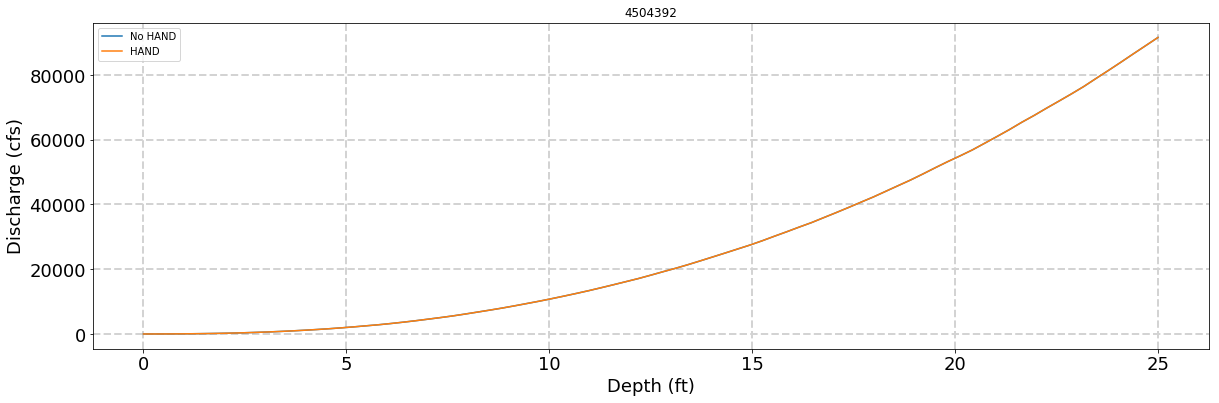

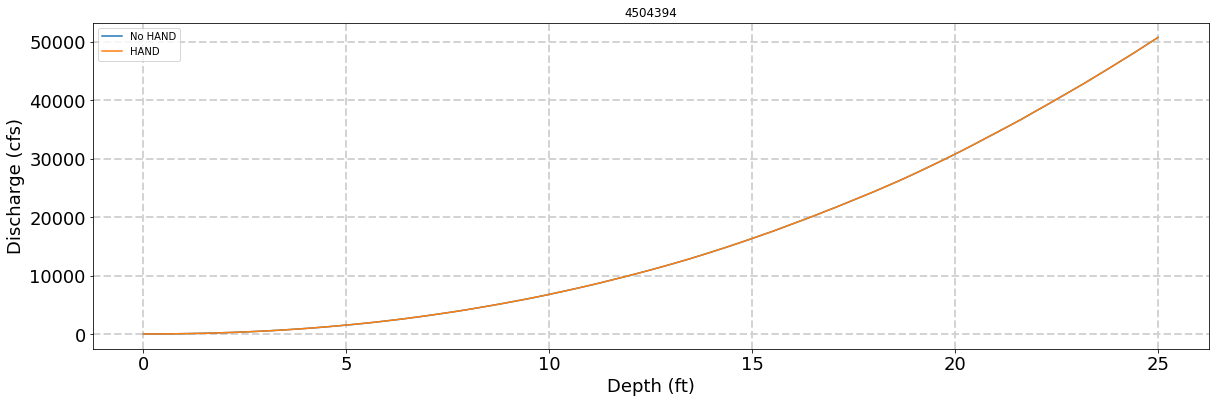

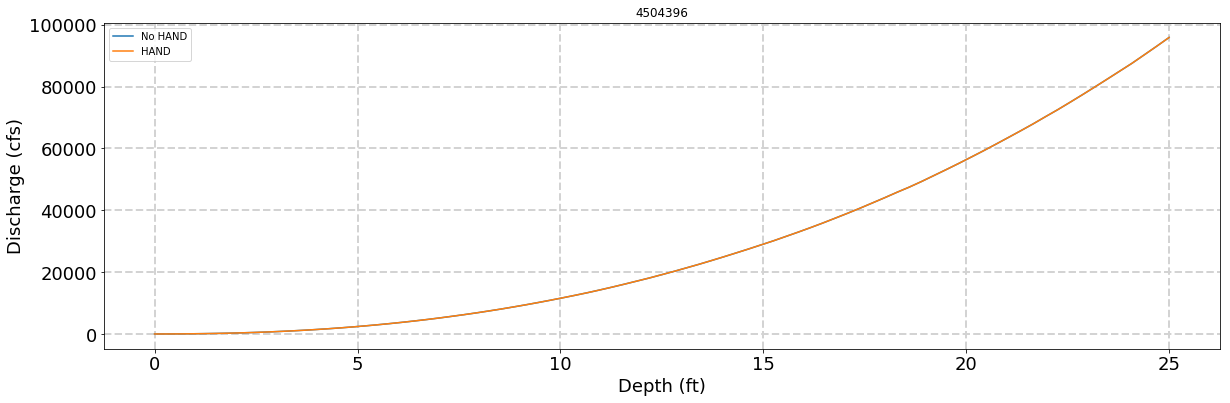

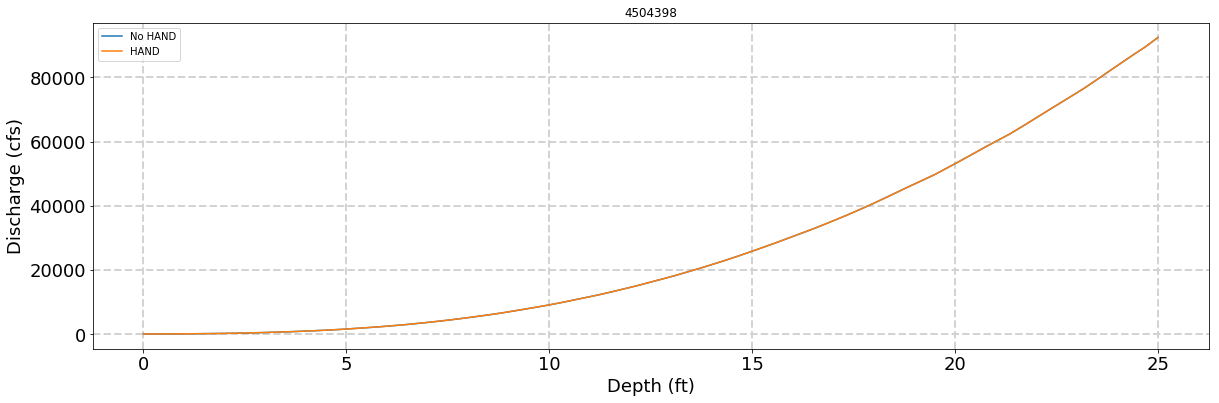

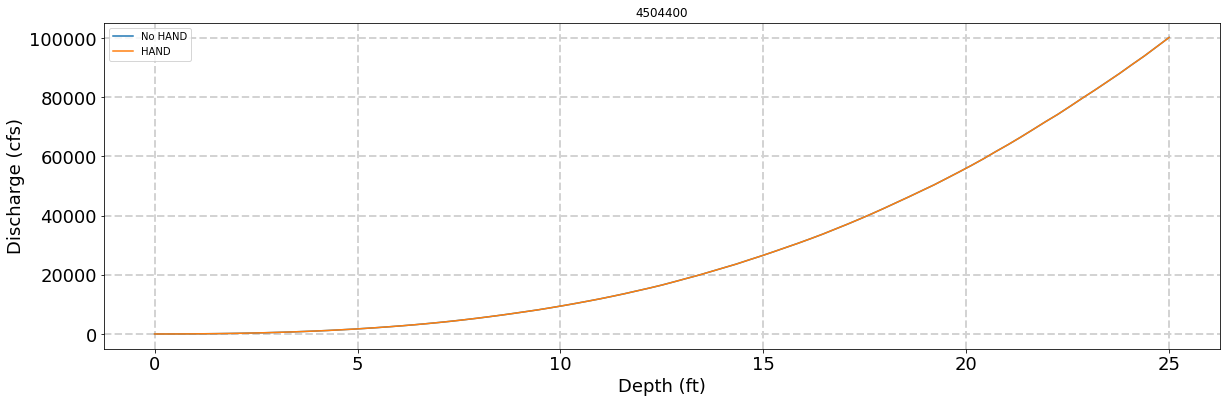

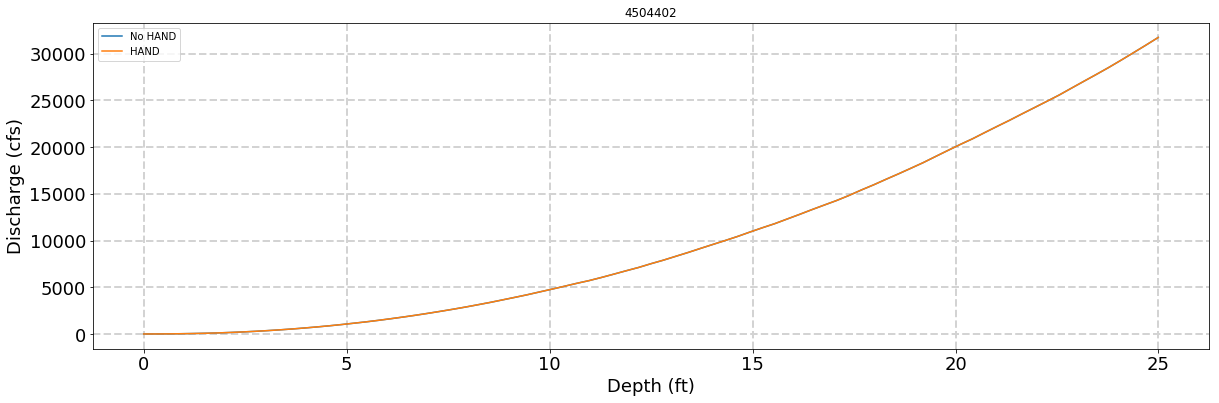

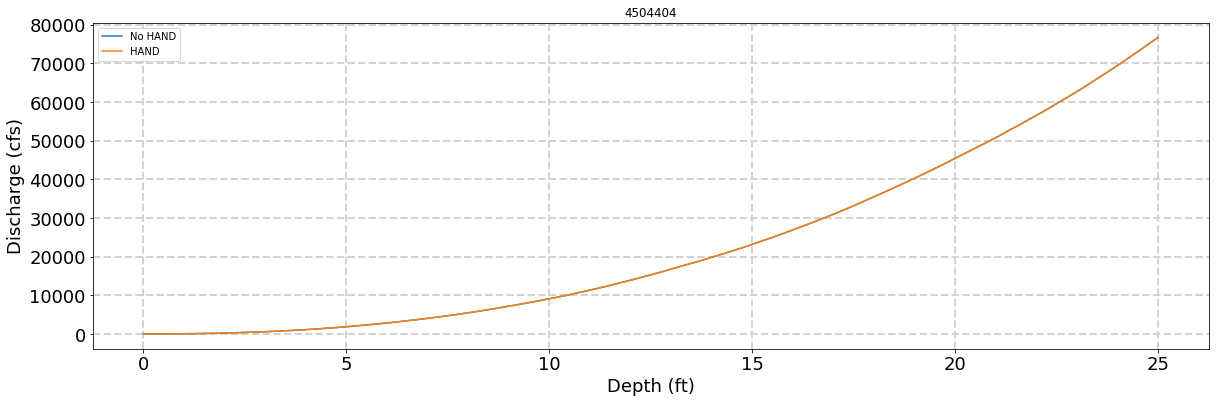

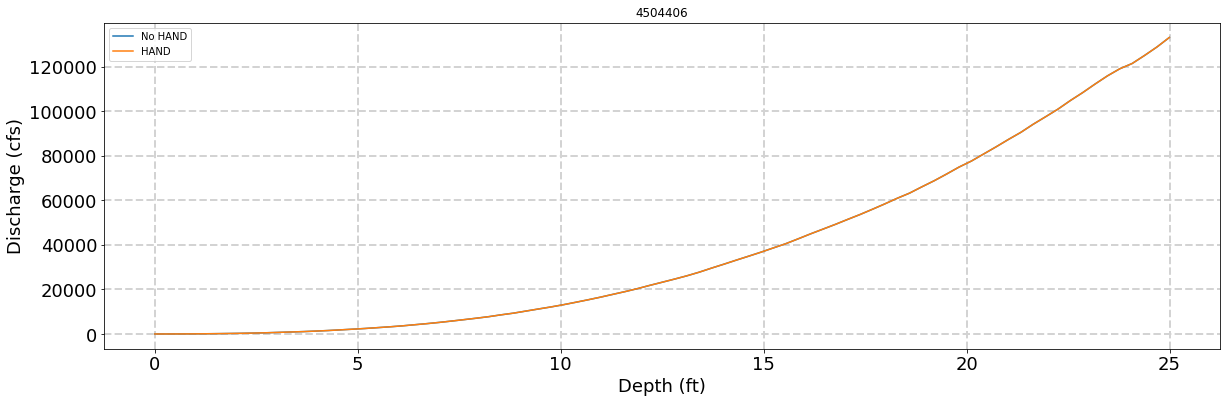

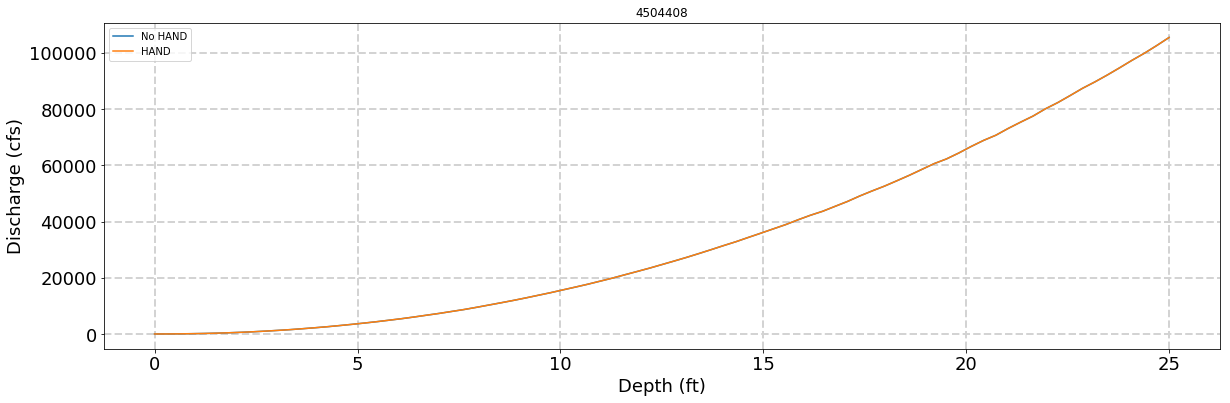

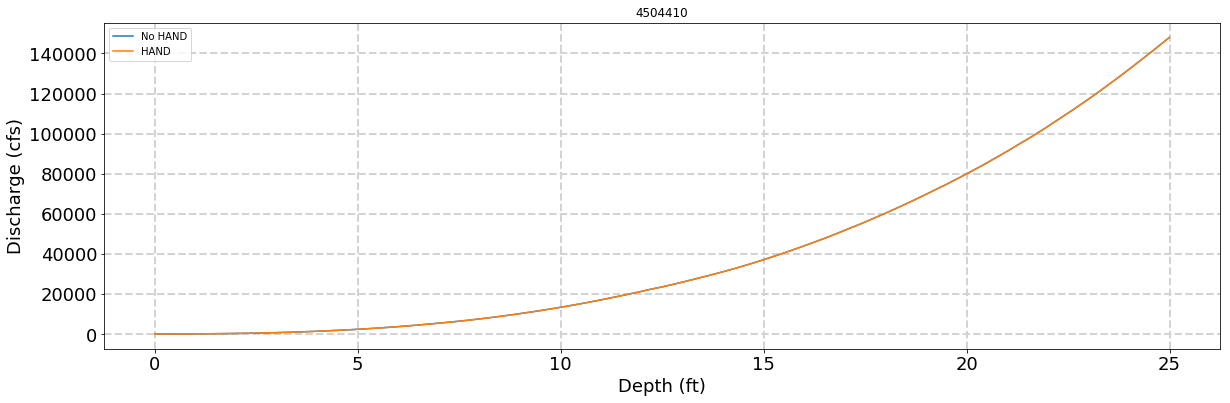

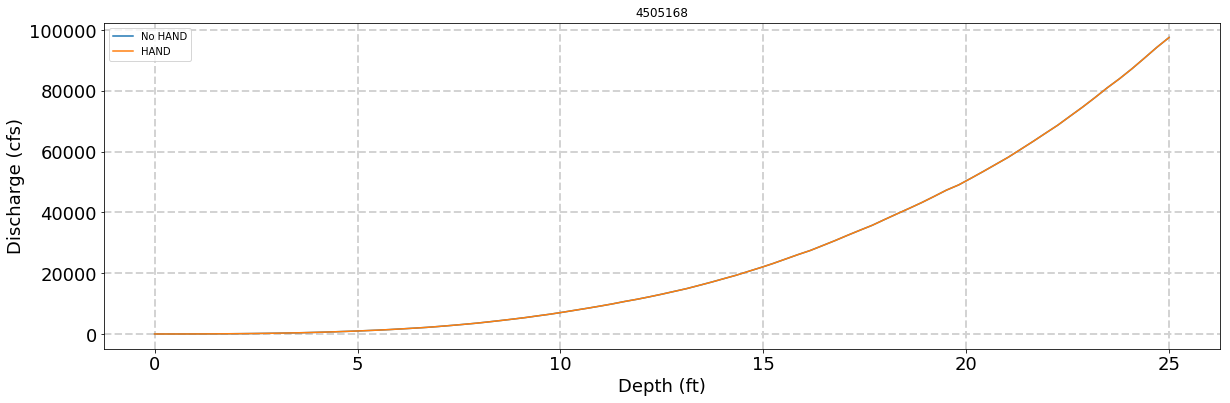

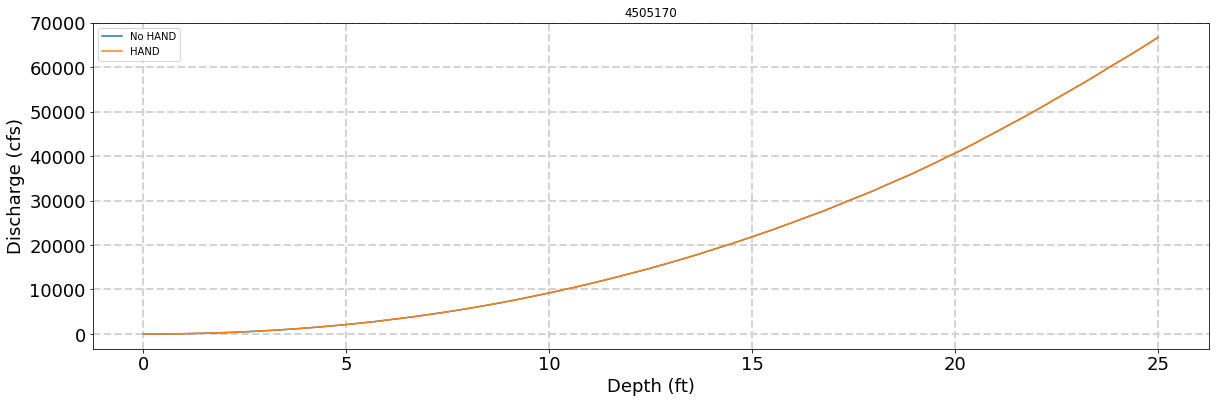

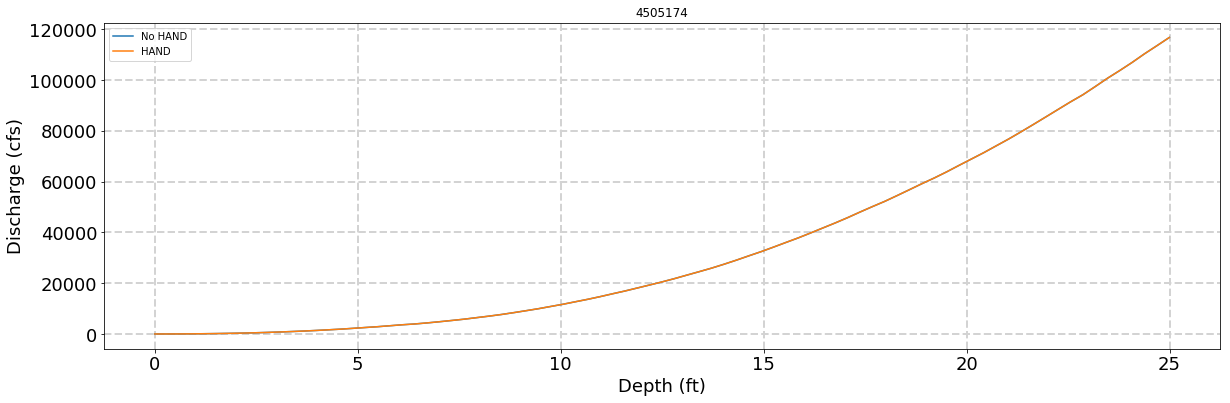

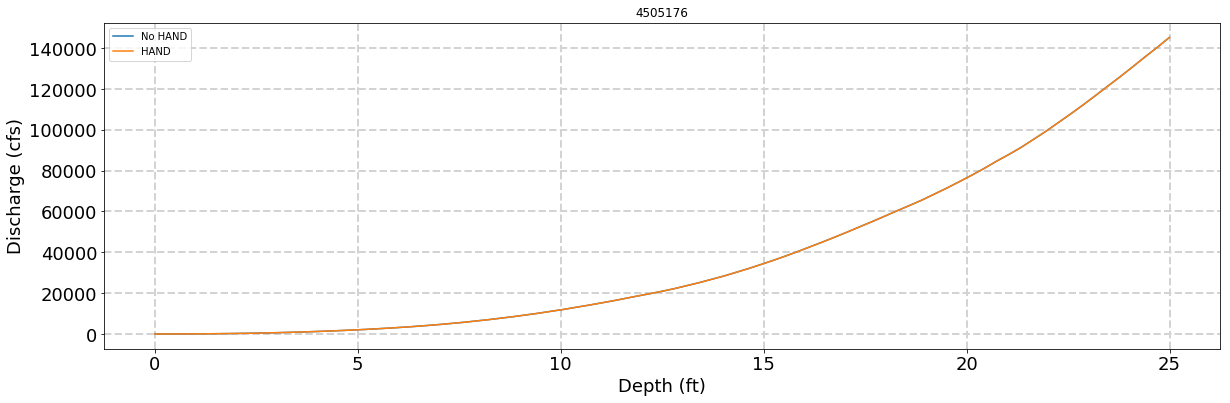

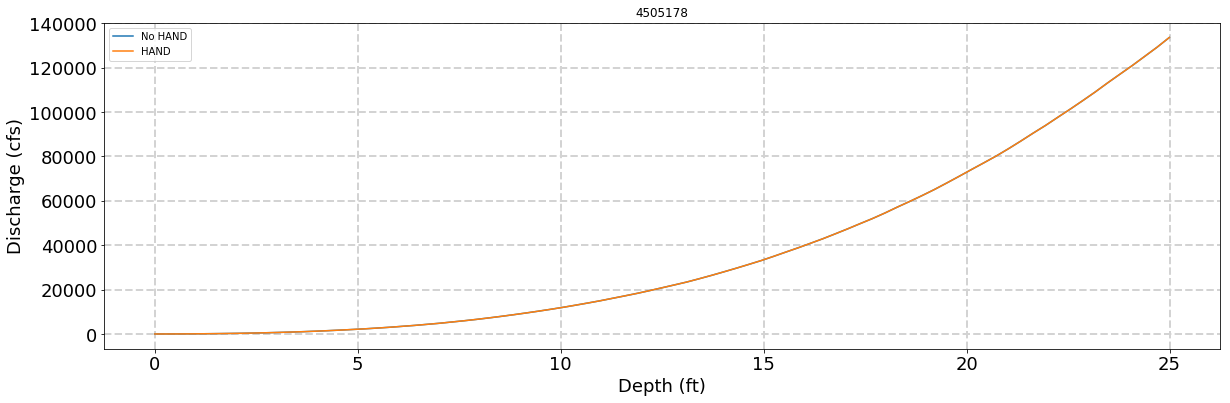

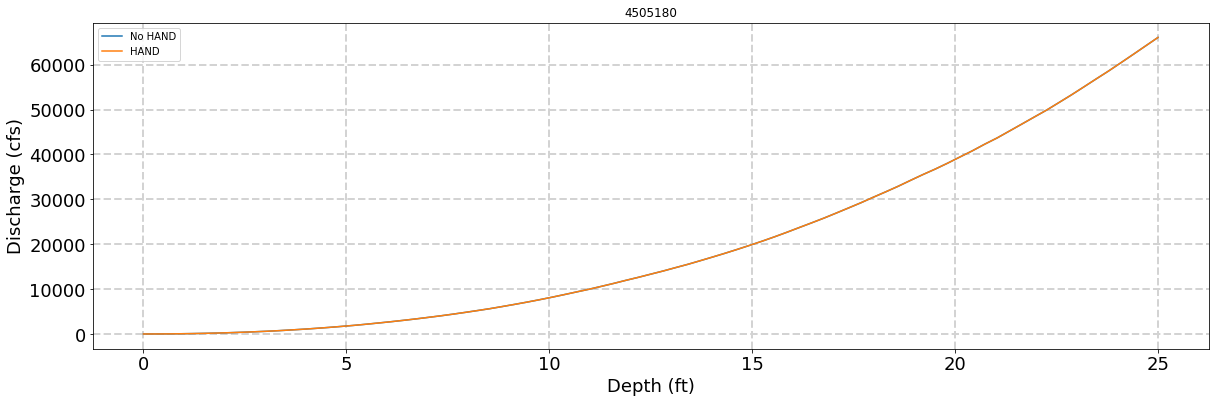

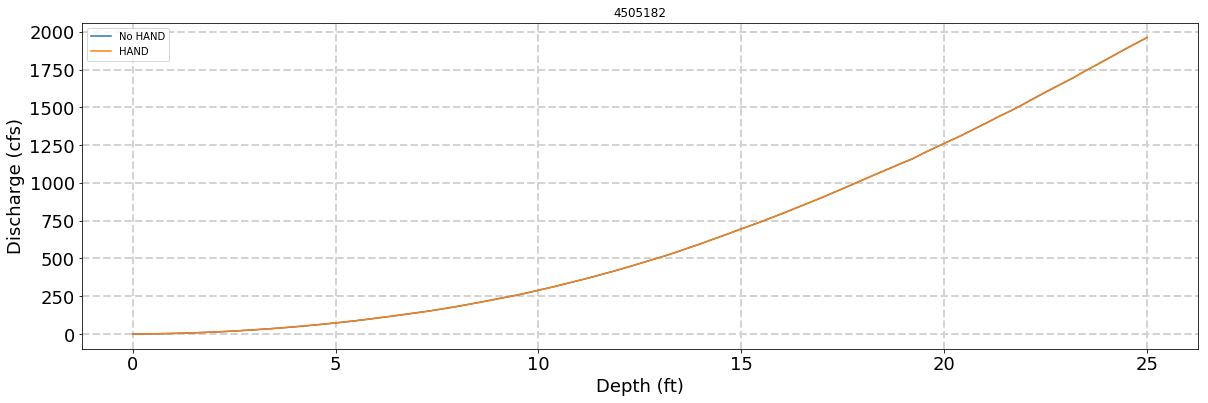

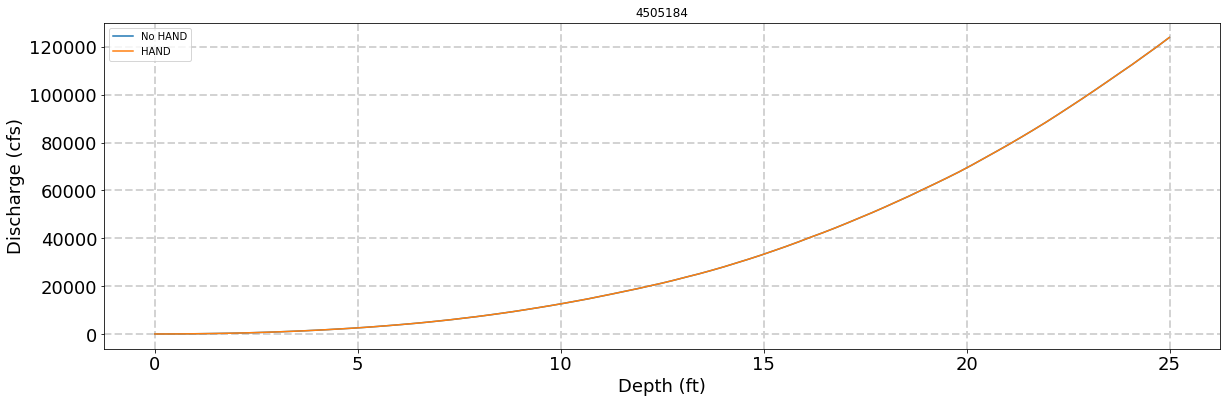

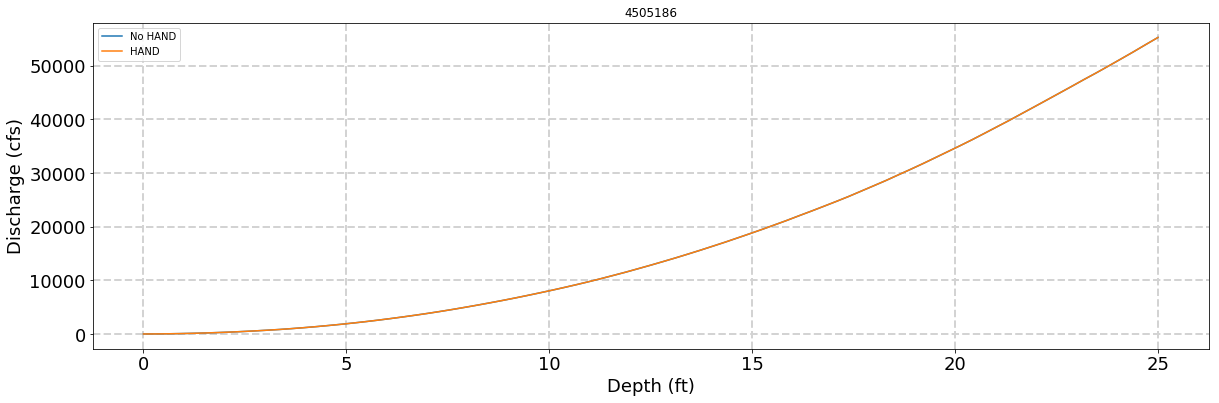

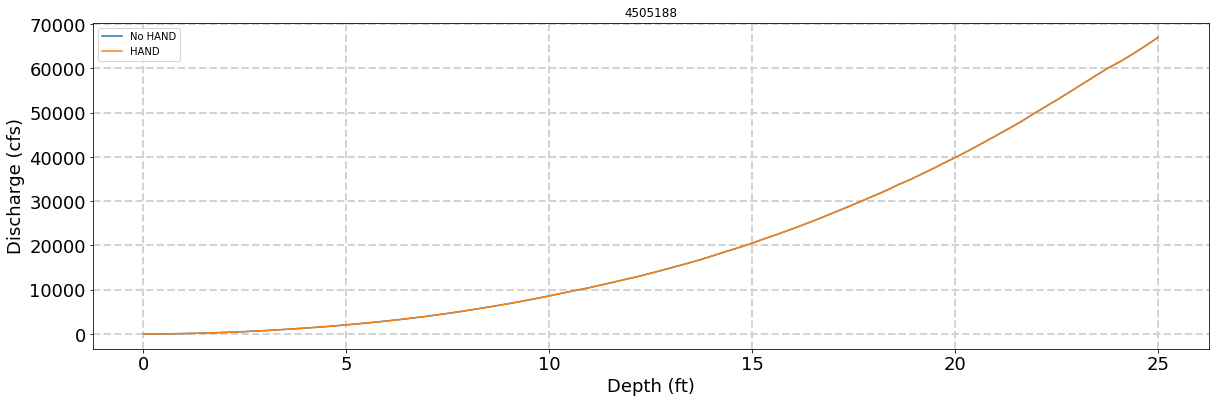

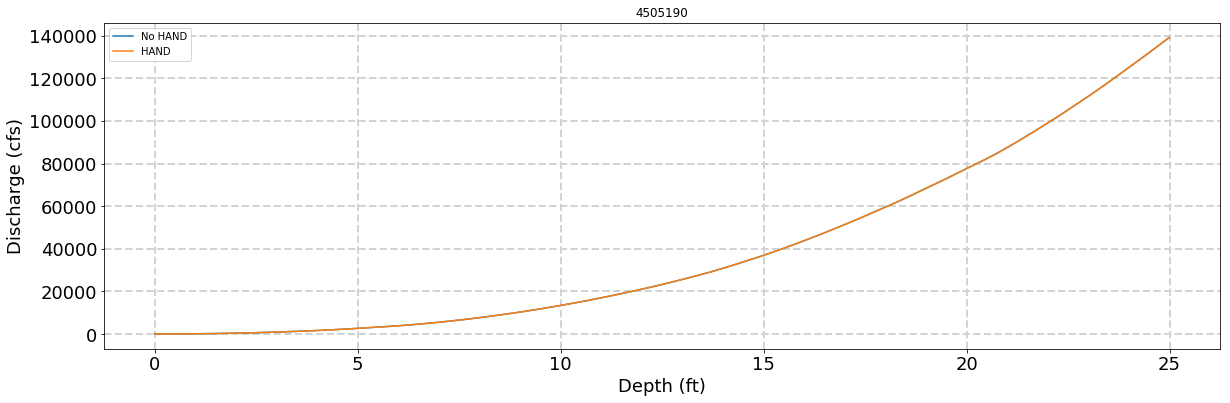

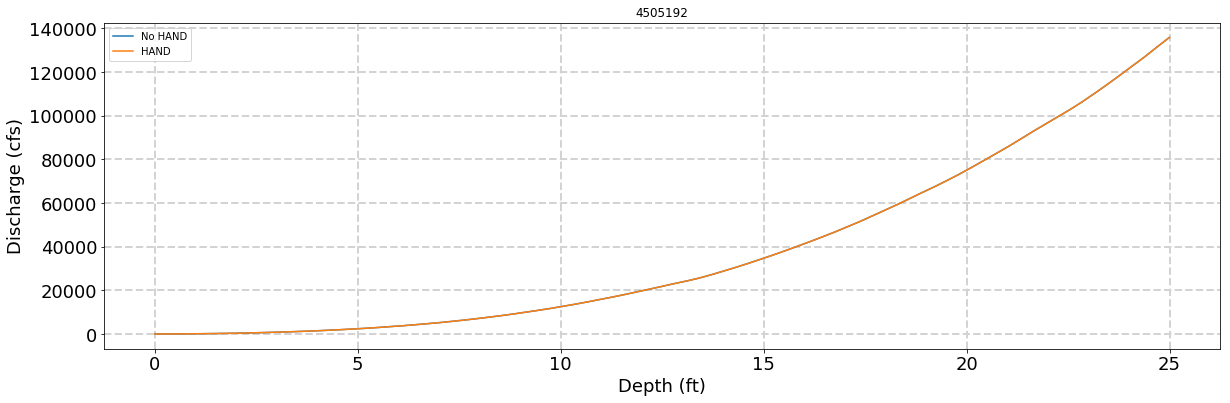

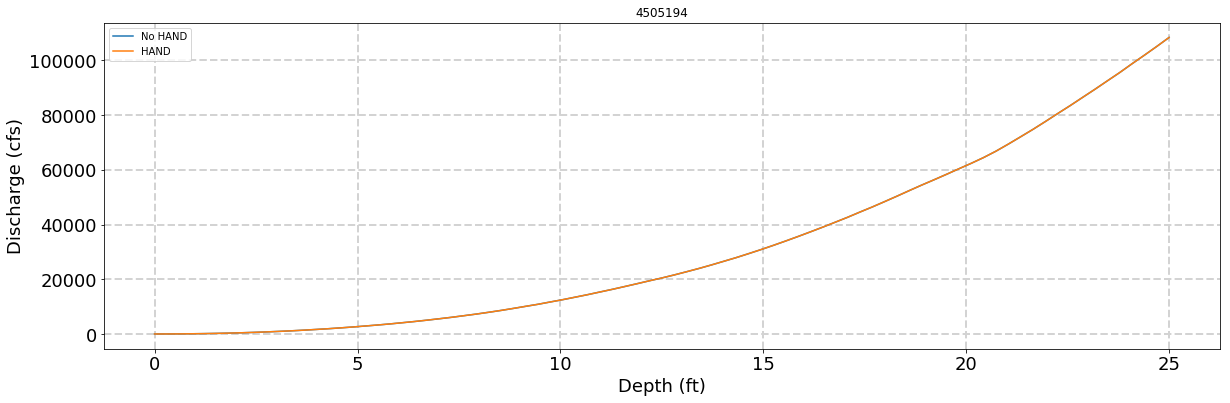

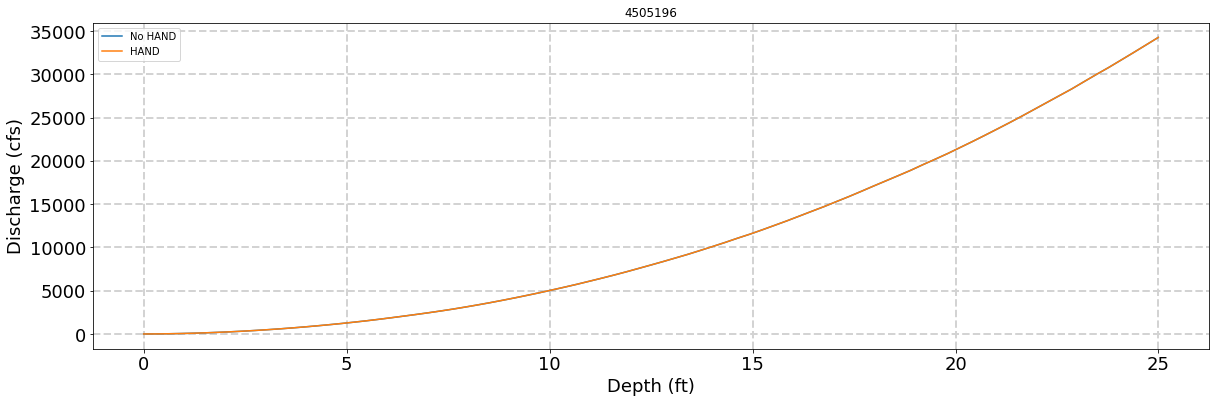

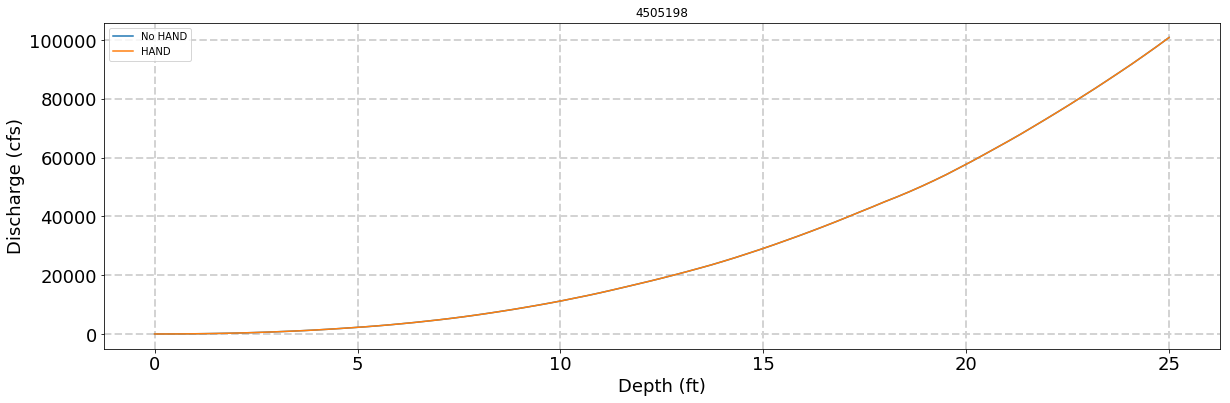

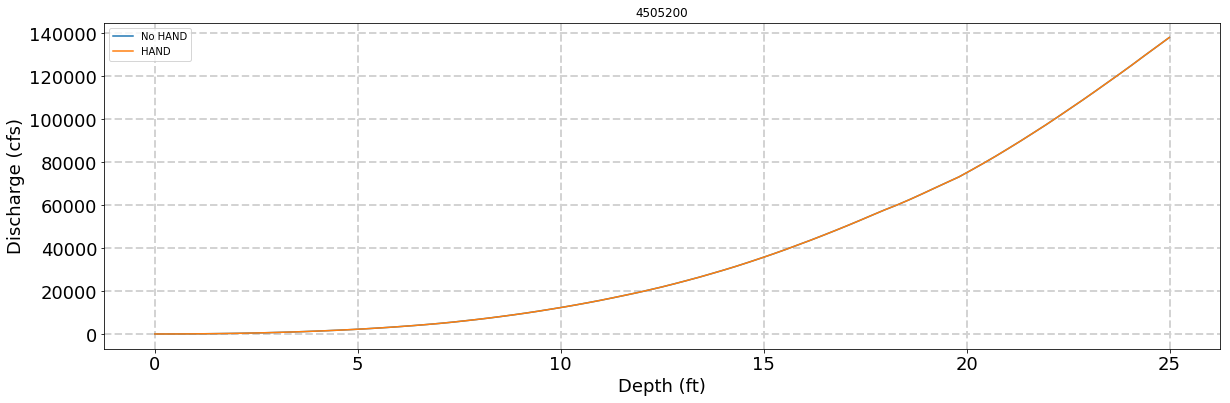

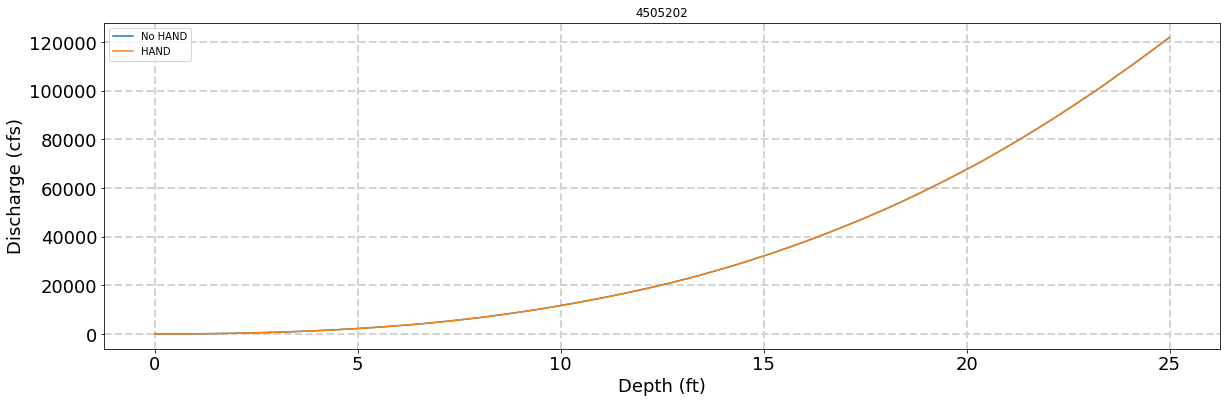

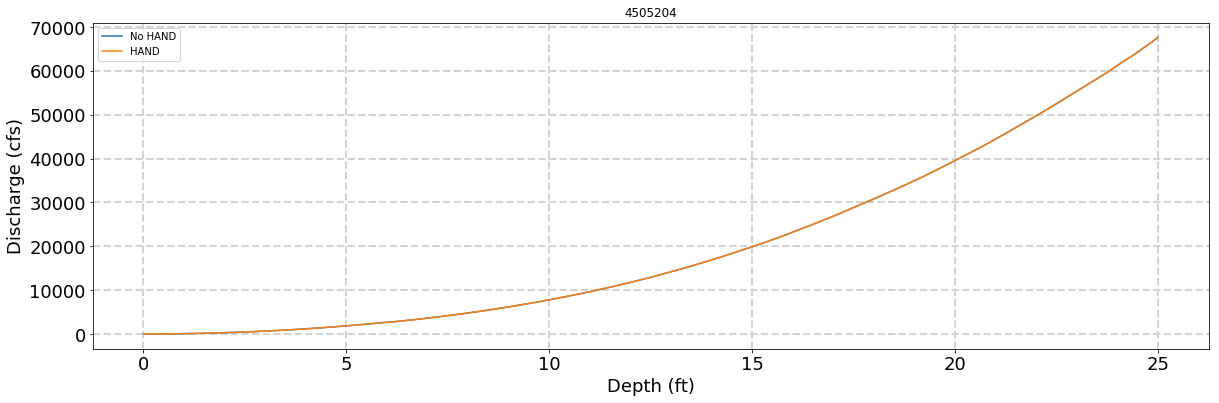

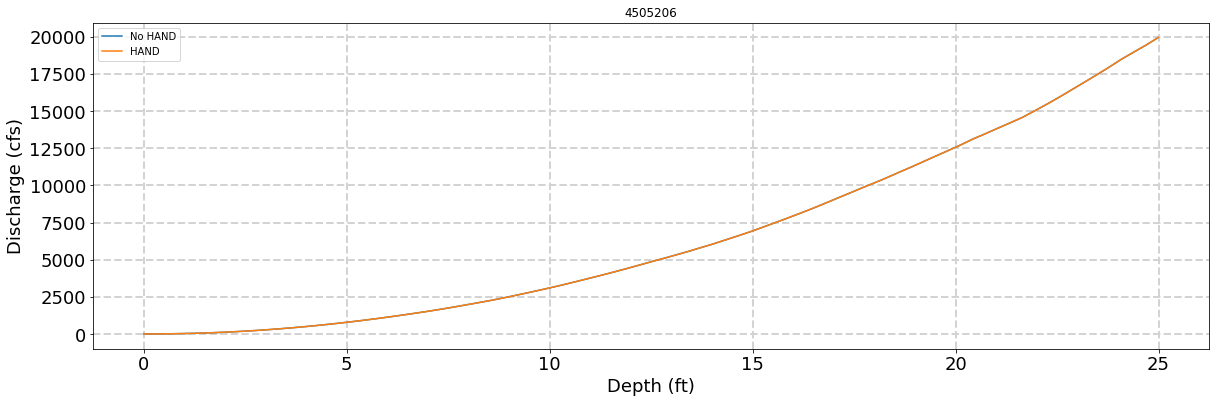

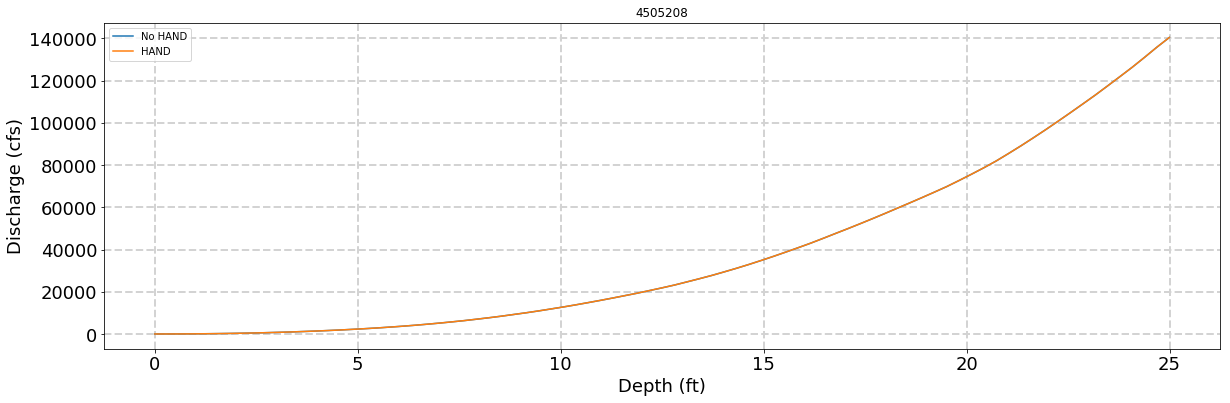

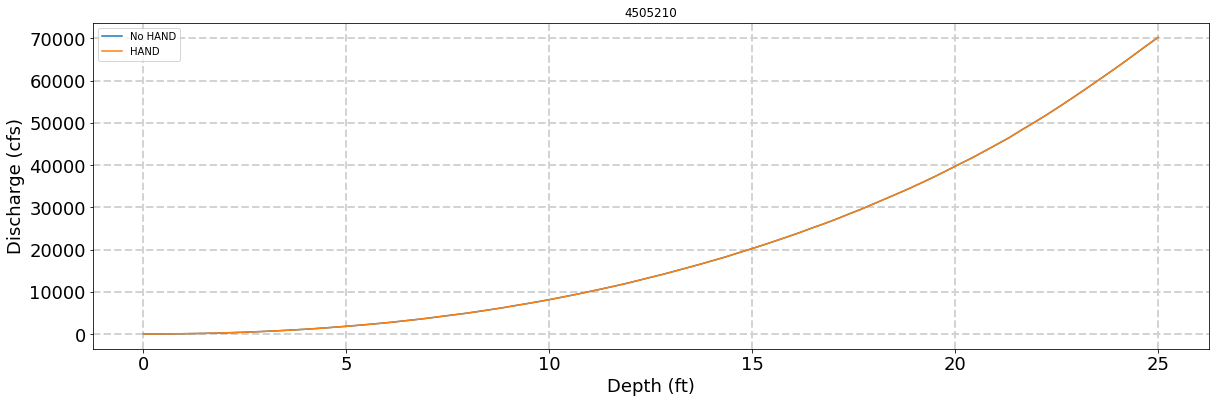

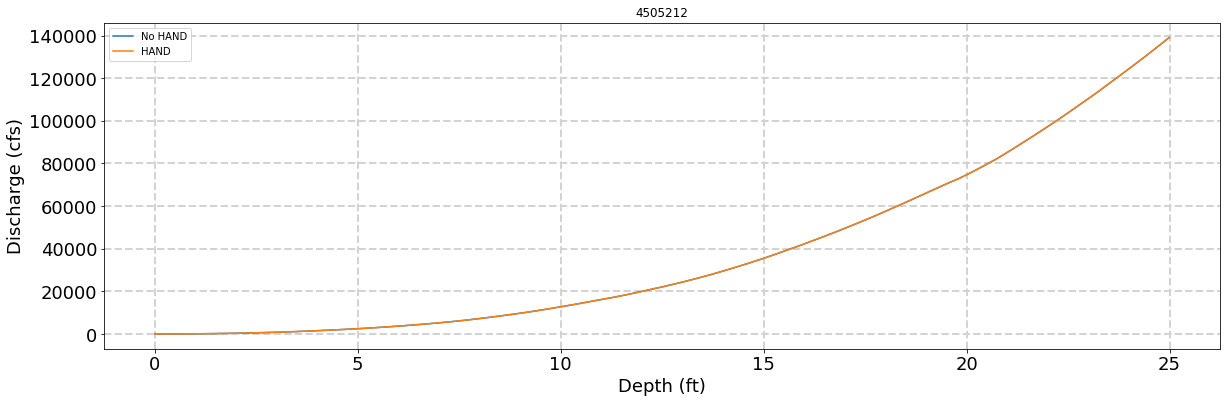

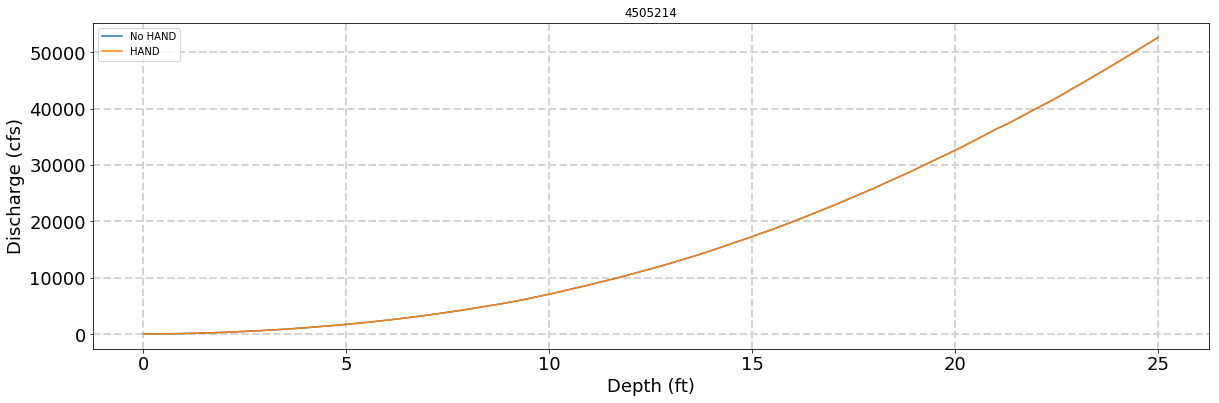

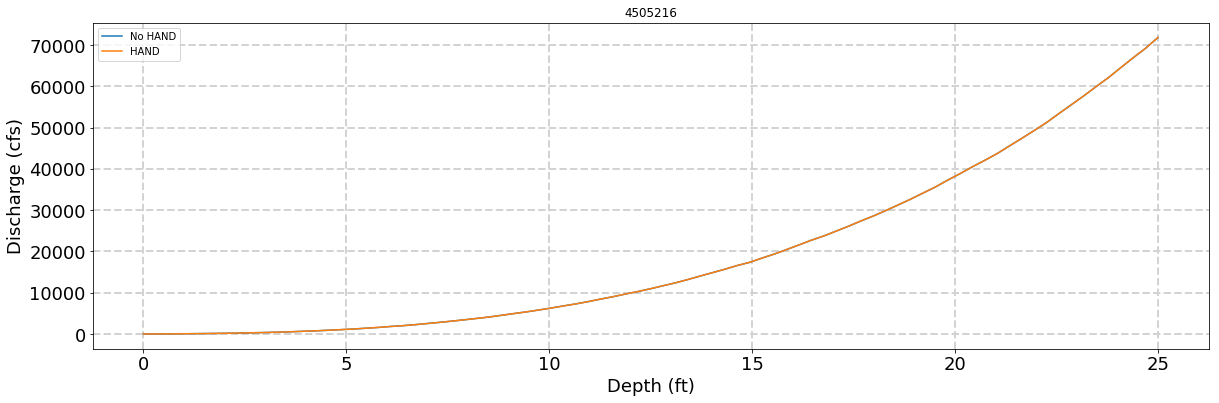

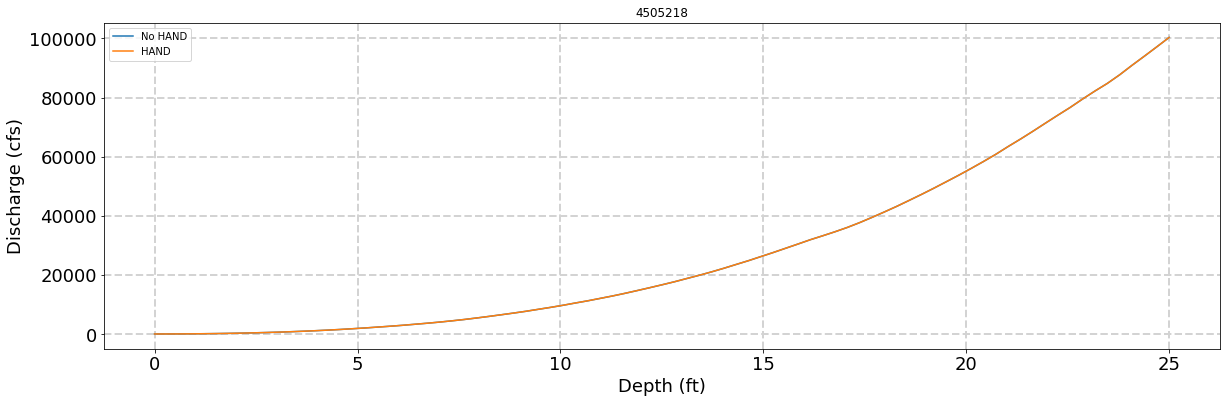

In [10]:
# Plot the first 50 group

figsize=(20,6)
fontsize=18


for name, data in selected_grpd:
    data_HD = selected_grpd_HD.get_group(name)
    
    fig,  ax = plt.subplots(figsize=figsize)
    ax.set_xlabel('Depth (ft)', fontsize=fontsize)
    ax.set_ylabel('Discharge (cfs)', fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid(which='major', color='lightgrey', linestyle='--', linewidth=2)

    ax.plot(data.Stage.values, data['Discharge (m3s-1)'].values, label = "No HAND")
    ax.plot(data_HD.Stage.values, data_HD['Discharge (m3s-1)'].values, label = "HAND")
    ax.set_title(name)
    ax.legend()
    
   

Text(0.5,1,'All Rating Curves for HUC 020700')

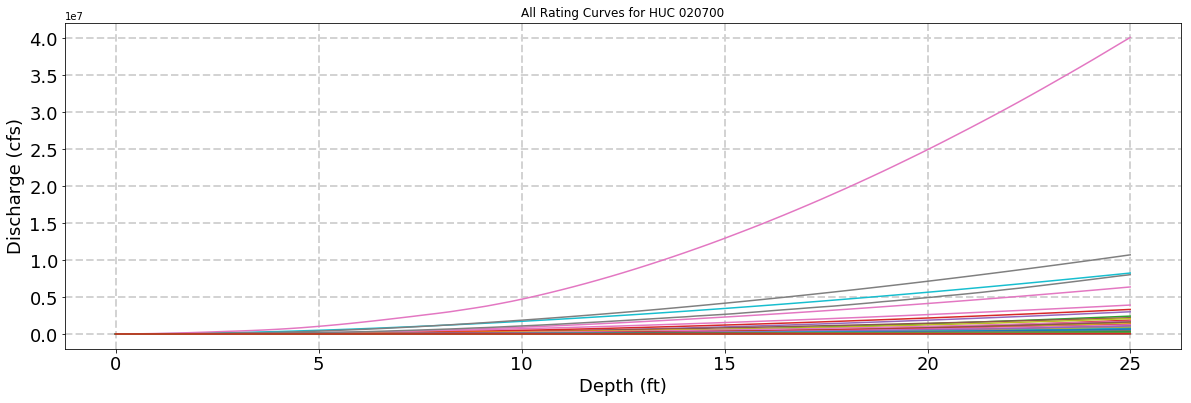

In [11]:
# Plot All Rating Curves on the same plot

figsize=(20,6)
fontsize=18

fig,  ax = plt.subplots(figsize=figsize)
ax.set_xlabel('Depth (ft)', fontsize=fontsize)
ax.set_ylabel('Discharge (cfs)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.grid(which='major', color='lightgrey', linestyle='--', linewidth=2)


for name, data in grpd:
    
    ax.plot(data.Stage.values, data['Discharge (m3s-1)'].values, label = name)
    

ax.set_title("All Rating Curves for HUC 020700")

#ax.legend()
    